Best threshold = 82


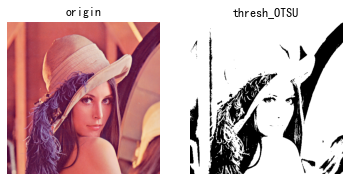

In [1]:
# 大律法OTSU
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def OTSU(img_array):            #传入的参数为ndarray形式
    height = img_array.shape[0]
    width = img_array.shape[1]
    count_pixel = np.zeros(256)

    for i in range(height):
        for j in range(width):
            count_pixel[int(img_array[i][j])] += 1

    max_variance = 0.0
    best_thresold = 0
    for thresold in range(256):
        n0 = count_pixel[:thresold].sum()
        n1 = count_pixel[thresold:].sum()
        w0 = n0 / (height * width)
        w1 = n1 / (height * width)
        u0 = 0.0
        u1 = 0.0

        for i in range(thresold):
            u0 += i * count_pixel[i]
        for j in range(thresold, 256):
            u1 += j * count_pixel[j]

        u = u0 * w0 + u1 * w1
        tmp_var = w0 * np.power((u - u0), 2) + w1 * np.power((u - u1), 2)

        if tmp_var > max_variance:
            best_thresold = thresold
            max_variance = tmp_var

    return best_thresold
img_origin = cv2.imread("lena.png")
img = img_origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = np.array(img).astype(np.float32)
Best_T = OTSU(img)
print("Best threshold = {}".format(Best_T))
ret2, thresh = cv2.threshold(img, Best_T, 255, cv2.THRESH_BINARY)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.subplot(121), plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)),
plt.title('origin'), plt.axis('off')
plt.subplot(122), plt.imshow(thresh, cmap='gray'),
plt.title("thresh_OTSU"), plt.axis('off')
plt.show()

Best threshold = 118


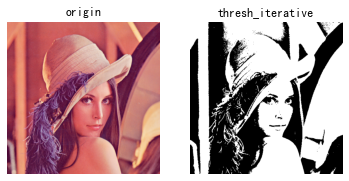

In [2]:
# 迭代法iterative
img_origin = cv2.imread("lena.png")
img = img_origin.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
T = img.mean()

while True:
    t0 = img[img < T].mean()
    t1 = img[img >= T].mean()
    t  = (t0 + t1) / 2
    if abs(T - t) < 1:
        break
    T = t
Best_T = int(T)

print("Best threshold = {}".format(Best_T))
th, thresh_iterative = cv2.threshold(img, Best_T, 255, 0)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.subplot(121), plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)),
plt.title('origin'), plt.axis('off')
plt.subplot(122), plt.imshow(thresh_iterative, cmap='gray'),
plt.title("thresh_iterative"), plt.axis('off')
plt.show()